# Import Libraries

In [21]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for plots to appear in the notebook
%matplotlib inline

# Pipeline
from sklearn.pipeline import make_pipeline

# preprocessing
from sklearn.preprocessing import StandardScaler

# Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score, recall_score

## Loading Data

In [22]:
df = pd.read_csv('heart.csv')

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [25]:
df.shape

(303, 14)

## Perform EDA

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [27]:
df.isnull().sum() # :D

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Text(0.5, 1.0, 'Correlation between variables')

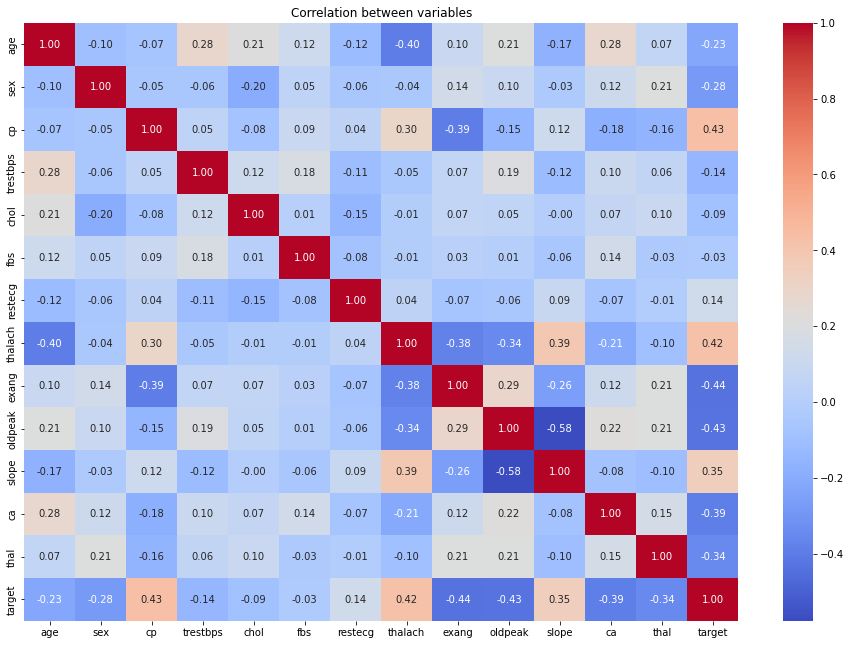

In [29]:
# Let's visualize the correlation between independent variables

correlation = df.corr()
plt.figure(figsize=(16, 11))
sns.heatmap(correlation, annot = True, fmt = ".2f", cmap = 'coolwarm')
plt.title('Correlation between variables')

## Lets see visual relation between target and other variables

In [30]:
# (1) => has heart disease, (0) => doesn't have disease

df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [31]:
# Normalize results
df.target.value_counts(normalize = True)

1    0.544554
0    0.455446
Name: target, dtype: float64

## Results:
1. 165 people have disease which it is almost 54.4% of the whole data
2. 138 people don't have disease which it is almost 45.5% of the whole data

Text(0, 0.5, 'Count')

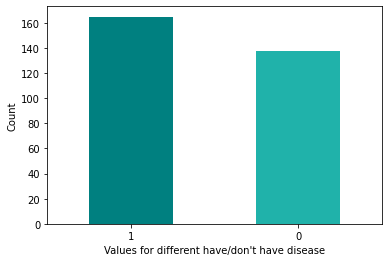

In [32]:
# Plotting the value counts with a bar graph

df.target.value_counts().plot(kind = "bar", color = ["teal", "lightseagreen"])
plt.xticks(rotation = 0) # Keep labels on the x-axis
plt.xlabel("Values for different have/don't have disease")
plt.ylabel("Count")

In [33]:
# Women and men in the dataset : (1) represents males and (0) represents females
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [34]:
df.sex.value_counts(normalize = True)

1    0.683168
0    0.316832
Name: sex, dtype: float64

## There are 207 (~68%) males and 96 (~32%) females

Text(0, 0.5, 'Count')

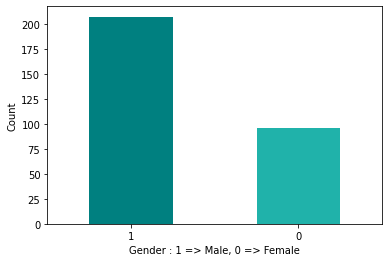

In [35]:
# Plotting the value counts with a bar graph

df.sex.value_counts().plot(kind = "bar", color = ["teal", "lightseagreen"])
plt.xticks(rotation = 0) # Keep labels on the x-axis
plt.xlabel("Gender : 1 => Male, 0 => Female")
plt.ylabel("Count")

In [36]:
# Comparing target with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [37]:
# Comparing target with sex column
pd.crosstab(df.target, df.sex, normalize=True)

sex,0,1
target,,
0,0.079208,0.376238
1,0.237624,0.306931


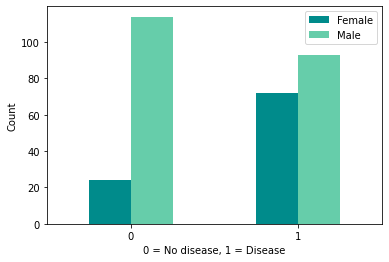

In [38]:
pd.crosstab(df.target, df.sex).plot(kind = "bar", color = ["darkcyan", "mediumaquamarine"])
plt.xticks(rotation = 0) # Keep labels on the x-axis
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"])

## Plotting age and max heart rate

Text(0.5, 1.0, 'Age distribution')

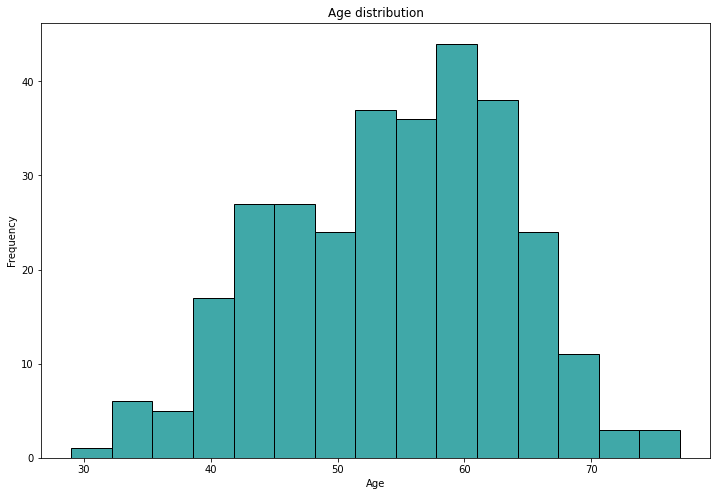

In [39]:
plt.figure(figsize = (12, 8))
sns.histplot(df, x = 'age', bins = 15, color = 'darkcyan')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution")
# Normal distribution

Text(0.5, 1.0, 'Age distribution')

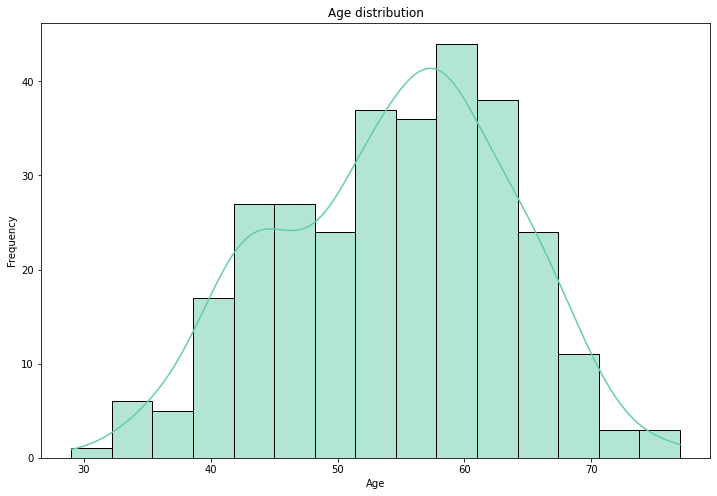

In [40]:
plt.figure(figsize = (12, 8))
sns.histplot(df, x = 'age', bins = 15, kde = True, color = 'mediumaquamarine', )
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution")
# Normal distribution

## Heart Disease Frequency per Chest Pain Type

In [41]:
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


## cp - Chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart  
1: Atypical angina: chest pain not related to heart   
2: Non-anginal pain: typically esophageal spasms (non heart related)   
3: Asymptomatic: chest pain not showing signs of disease   

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

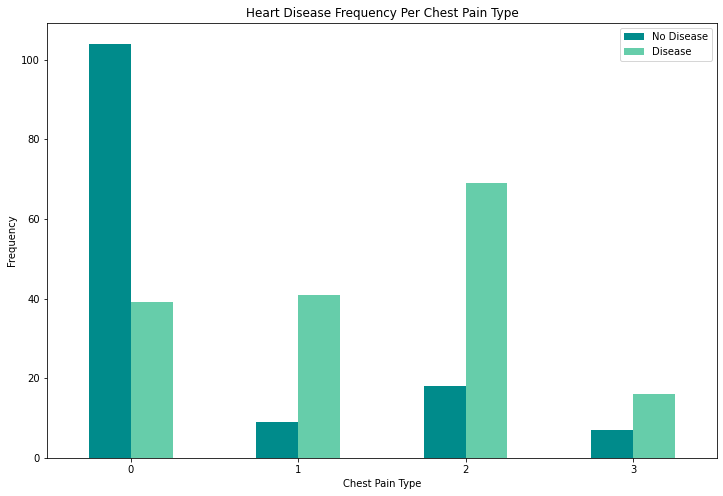

In [42]:
pd.crosstab(df.cp, df.target).plot(kind = "bar", figsize = (12, 8), color = ["darkcyan", "mediumaquamarine"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0)

## Model implementation

In [43]:
# Independent features
X = df.drop("target", axis = 1)
# Target feature
y = df.target.values

In [44]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [45]:
y, len(y)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## Training and test sets

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


## Model choices
I'm going to implement these models and compare thei results
1. Logistic Regression
2. KNN
3. Naive Bayes
4. SVM

## Logistic Regression

In [48]:
model_results = { }

In [49]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression())
pipeline.fit(X_train, y_train)
model_results['LogisticRegression'] = pipeline.score(X_test, y_test)

## KNN

In [50]:
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=11))
pipeline.fit(X_train, y_train)
model_results['KNN'] = pipeline.score(X_test, y_test)

## Naive Bayes

In [51]:
pipeline = make_pipeline(StandardScaler(), GaussianNB())
pipeline.fit(X_train, y_train)
model_results['Naive Bayes'] = pipeline.score(X_test, y_test)

## SVM (SVC)

In [52]:
pipeline = make_pipeline(StandardScaler(), SVC(kernel = 'linear', C = 1, gamma = 'auto'))
pipeline.fit(X_train, y_train)
model_results['SVC'] = pipeline.score(X_test, y_test)

In [53]:
model_results

{'LogisticRegression': 0.8688524590163934,
 'KNN': 0.8524590163934426,
 'Naive Bayes': 0.8360655737704918,
 'SVC': 0.9016393442622951}

## Models comparison

Text(0, 0.5, 'Accuracy out of 1')

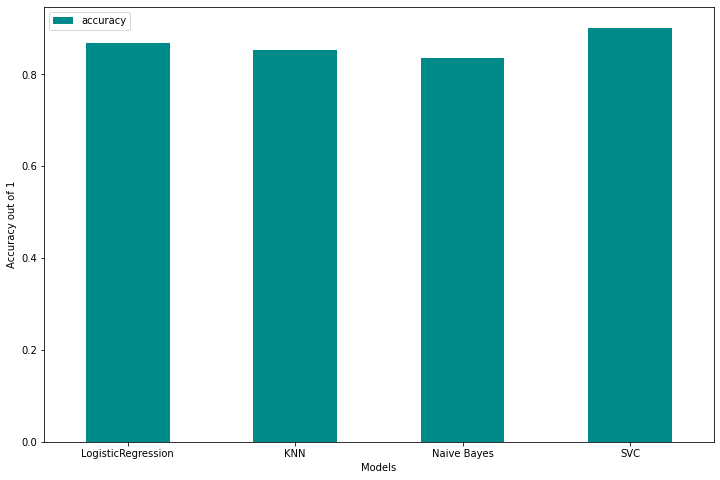

In [54]:
model_compare = pd.DataFrame(model_results, index = ["accuracy"])
model_compare.T.plot(kind = "bar", color = "darkcyan", figsize = (12, 8))
plt.xticks(rotation = 0)
plt.xlabel("Models")
plt.ylabel("Accuracy out of 1")

## Hyperparameter tuning and cross-validation with GridSearchCV

In [139]:
# Logistic Regression
log_reg_tuning = {"C": np.logspace(-4, 4, 20),
                  "solver": ['liblinear'],
                  }
grid_search_log_reg = GridSearchCV(LogisticRegression(), param_grid = log_reg_tuning, cv = 15, verbose = True)
grid_search_log_reg.fit(X_train, y_train)

Fitting 15 folds for each of 20 candidates, totalling 300 fits


GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [140]:
print(grid_search_log_reg.best_params_)
print(grid_search_log_reg.best_score_)

{'C': 0.08858667904100823, 'solver': 'liblinear'}
0.8318627450980393


## Logistic Regression after tuning: ~84% 

In [57]:
# KNN
knn_tuning = {"n_neighbors": [i for i in range(1,30)]}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid = knn_tuning, cv = 15, verbose = True)
grid_search_knn.fit(X_train, y_train)

Fitting 15 folds for each of 29 candidates, totalling 435 fits


GridSearchCV(cv=15, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             verbose=True)

In [58]:
print(grid_search_knn.best_params_)
print(grid_search_knn.best_score_)

{'n_neighbors': 22}
0.6774509803921569


## KNN after tuning: ~68%

In [59]:
# Naive Bayes
nb_tuning = {"var_smoothing": np.logspace(0, -9, 100)}
grid_search_nb = GridSearchCV(GaussianNB(), param_grid = nb_tuning, cv = 15, verbose = True)
grid_search_nb.fit(X_train, y_train)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=15, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=True)

In [60]:
print(grid_search_nb.best_params_)
print(grid_search_nb.best_score_)

{'var_smoothing': 3.511191734215127e-05}
0.8311274509803922


## Naive Bayes has a little change : ~83%

In [111]:
# SVM
svm_tuning = {"kernel": ['linear'], "C": [8.75],"gamma": [0.00001]}
grid_search_svm = GridSearchCV(SVC(), param_grid = svm_tuning, cv = 15, verbose = True)
grid_search_svm.fit(X_train, y_train)

Fitting 15 folds for each of 4 candidates, totalling 60 fits


GridSearchCV(cv=15, estimator=SVC(),
             param_grid={'C': [8.75], 'gamma': [1e-05, 0.0001, 0.001, 0.01],
                         'kernel': ['linear']},
             verbose=True)

In [112]:
print(grid_search_svm.best_params_)
print(grid_search_svm.best_score_)

{'C': 8.75, 'gamma': 1e-05, 'kernel': 'linear'}
0.8232843137254903


## SVC after tuning: ~82%

## Confusion matrix

In [113]:
y_predicted = grid_search_log_reg.predict(X_test)

In [114]:
confusion_matrix(y_test, y_predicted)

array([[21,  4],
       [ 1, 35]])

Text(0.5, 1.0, 'Truth table')

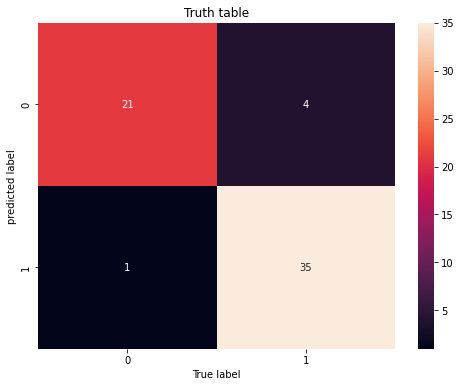

In [124]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_predicted), annot = True)
plt.xlabel("True label")
plt.ylabel("predicted label")
plt.title("Truth table")

## Classification Report

In [126]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.90      0.97      0.93        36

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61



In [142]:
grid_search_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [143]:
# Instantiating model with best hyperparameters (found with GridSearchCV)
logr = LogisticRegression(C = 0.0886, solver = 'liblinear')

In [145]:
cv_acc = cross_val_score(logr, X, y, cv = 15, scoring = 'accuracy')
cv_acc

array([0.85714286, 0.85714286, 0.80952381, 0.85      , 0.9       ,
       1.        , 0.85      , 1.        , 0.8       , 0.9       ,
       0.8       , 0.9       , 0.65      , 0.8       , 0.7       ])

In [146]:
cv_acc = np.mean(cv_acc)
cv_acc

0.844920634920635

## Precision, Recall, f1 score

In [149]:
cv_precision = np.mean(cross_val_score(logr,
                                       X,
                                       y,
                                       cv = 15, # 5-fold cross-validation
                                       scoring = "precision")) # precision as scoring
cv_precision

0.8242579642579642

In [150]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(logr,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9030303030303031

In [151]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(logr,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8572876223964057

## Visualizing metrics

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'Precision'),
  Text(2, 0, 'Recall'),
  Text(3, 0, 'F1 Score')])

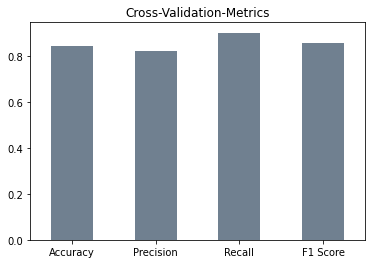

In [160]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1 Score": cv_f1},
                           index = [0])
cv_metrics.T.plot(kind = "bar", title = "Cross-Validation-Metrics", legend = False, color = ["slategrey"])
plt.xticks(rotation = 0)

## Future works
1. Implementing Random Forest on the dataset
2. Implementing Decision Tree

# Thank you <3